In [161]:
import pandas as pd
from datetime import datetime
import pickle
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [3]:
with open('conversationframe.pkl', 'rb') as input:
    conversationframe = pickle.load(input)

,conv,delta,mean,month,year
time,,,,,
2020-02-01 00:02:52+00:00,level_0 in_reply_to_status_id ...,-0.476863,-0.101277,2,2020
2020-02-01 00:02:52+00:00,level_0 in_reply_to_status_id ...,-0.363490,-0.396045,2,2020
2020-02-01 00:11:22+00:00,level_0 in_reply_to_status_id ...,0.595188,-0.433091,2,2020
2020-02-01 00:17:21+00:00,level_0 in_reply_to_status_id ...,0.361903,-0.486868,2,2020
2020-02-01 00:25:37+00:00,level_0 in_reply_to_status_id ...,-0.021776,-0.715104,2,2020
...,...,...,...,...,...
2020-02-29 23:33:50+00:00,level_0 in_reply_to_status_id ...,-0.061174,0.523909,2,2020
2020-02-29 23:39:25+00:00,level_0 in_reply_to_status_id ...,-0.382886,-0.357268,2,2020
2020-02-29 23:45:08+00:00,level_0 in_reply_to_status_id ...,0.794742,-0.411270,2,2020


In [126]:
def getConvsForStr(string,userid,frame,mode):
    time = datetime.now()
    
    lst = []

    for i in frame['conv']:
        if np.mean(i['text'].apply(lambda x: x.lower()).str.contains(string)) > 0:
            lst.append(True)
        else:
            lst.append(False)
    
    print(datetime.now()-time)
    testframe = frame[lst]
    lst = []
    if mode == 'A':
        for i in testframe['conv']:
            lastindex = i.tail(1).index
            for index, j in i.iterrows():
                if j['user_id'] == userid and ~math.isnan(j['in_reply_to_status_id']):
                    lst.append(True)
                    break
                if index == lastindex:
                    lst.append(False)
                    break

    else:
        for i in testframe['conv']:
            lst1 = (i['user_id'] == userid).to_list()
            lst2 = (i['in_reply_to_status_id'].apply(lambda x: not math.isnan(x)).to_list())
            if np.mean([a and b for a, b in zip(lst1, lst2)]) > 0:
                lst.append(True)
            else:
                lst.append(False)
    testframe['participated'] = lst
    print(datetime.now()-time)
    return testframe

In [155]:
# String Userid Frame

current = datetime.now()
klmconvs = getConvsForStr('@klm',56377143,conversationframe,'B')
afconvs = getConvsForStr('@airfrance',106062176,conversationframe,'B')
baconvs = getConvsForStr('@british_airways',18332190,conversationframe,'B')
ejconvs = getConvsForStr('@easyjet',38676903,conversationframe,'B')
lhconvs = getConvsForStr('@lufthansa',124476322,conversationframe,'B')
print(datetime.now()-current)

0:01:42.066716


C:\Users\david\anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0:01:50.782707
0:01:45.794985
0:01:48.074750
0:01:47.575012
0:02:01.852152
0:01:52.649566
0:02:04.376812
0:01:50.147234
0:01:54.827717
0:09:39.917131


In [156]:
klmconvs['airline'] = 'KLM'
afconvs['airline'] = 'AirFrance'
baconvs['airline'] = 'British Airways'
ejconvs['airline'] = 'EasyJet'
lhconvs['airline'] = 'Lufthansa'

C:\Users\david\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\david\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\david\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [157]:
allairlines = pd.concat([klmconvs,ejconvs,afconvs,lhconvs,baconvs])

In [158]:
allairlines.to_csv('ConvsByAirlines.csv')

Text(0.5, 0, '')

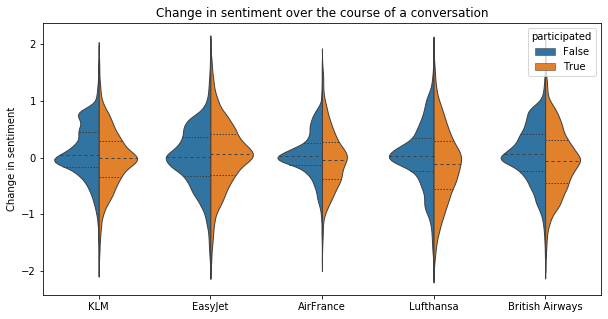

In [167]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.violinplot(data=allairlines, x='airline',y="delta", hue="participated",
               split=True, inner="quart", linewidth=1)
ax.set_title('Change in sentiment over the course of a conversation')
ax.set_ylabel('Change in sentiment')
ax.set_xlabel(None);